# Pygor3 tutorial
## Ojectives
- Create simple scripts to run common tasks like:
    - Read data 
    - Make alignments and then
    - Evaluate the pgen of a sequence
- Easy reports
    - Visualization of data in single web apps or pdf files
- Create personalized models:
    - Create models using a bayesian network
    - Download data from imgt a create a using default or new defined networksmodels params

In [1]:
fln_model_parms ='/home/alfaceor/.local/share/igor/models/human/tcr_beta/models/model_parms.txt'
!head {fln_model_parms}

@Event_list
#GeneChoice;V_gene;Undefined_side;7;v_choice
%U66059|TRBV9*01|Homo sapiens|F|V-REGION|206836..207121|286 nt|1| | | | |286+0=286| | |;GATTCTGGAGTCACACAAACCCCAAAGCACCTGATCACAGCAACTGGACAGCGAGTGACGCTGAGATGCTCCCCTAGGTCTGGAGACCTCTCTGTGTACTGGTACCAACAGAGCCTGGACCAGGGCCTCCAGTTCCTCATTCAGTATTATAATGGAGAAGAGAGAGCAAAAGGAAACATTCTTGAACGATTCTCCGCACAACAGTTCCCTGACTTGCACTCTGAACTAAACCTGAGCTCTCTGGAGCTGGGGGACTCAGCTTTGTATTTCTGTGCCAGCAGCGTAG;88
%M27385|TRBV7-9*05|Homo sapiens|(F)|V-REGION|34..321|288 nt|1| | | | |288+0=288| Edited | |;GATACTGGAGTCTCCCAGAACCCCAGACACAAGATCACAAAGAGGGGACAGAATGTAACTTTCAGGTGTGATCCAATTTCTGAACACAACCGCCTTTATTGGTACCGACAGACCCTGGGGCAGGGCCCAGAGTTTCTGACTTACTTCCAGAATGAAGCTCAACTAGAAAAATCAAGGCTGCTCAGTGATCGGTTCTCTGCAGAGAGGCCTAAGGGATCTCTCTCCACCTTGGAGATCCAGCGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCAGCAGCTTAGC;85
%X61441|TRBV7-8*02|Homo sapiens|F|V-REGION|497..786|290 nt|1| | | | |290+0=290| | |;GGTGCTGGAGTCTCCCAGTCCCCTAGGTACAAAGTCGCAAAGAGAGGACAGGATGTAGCTCTCAGGTGTGATCCAATTTCGGGTCATGTATCCCT

In [2]:
fln_model_marginal = '/home/alfaceor/.local/share/igor/models/human/tcr_beta/models/model_marginals.txt'
!head {fln_model_marginal}

@v_choice
$Dim[89]
#
%0.00488741,0.00932369,0.00932259,0.013032,0.00034343,0.00850694,0.0077125,0.000612276,0.00506104,4.59289e-05,0.00448245,0.00816181,0.000700053,0.00777164,0.0116174,0.0116158,0.0113872,0.0106555,0.0023687,0.0228368,0.000156715,0.00458447,0,4.88782e-05,0,0.01545,0.027405,0.00518979,0.00480289,0.162765,0.0661229,0.0207174,0.000736226,2.47846e-37,0.0107472,0.020382,0.00953245,0.00953006,0.00235607,0.00239208,0.00239208,0.00245219,0.0166904,0.00298807,0.00298804,0.0159156,0.0125468,0.00906711,0.00906936,0.0976534,0.00957746,0.00917011,0.0114472,0.0114458,0.00977554,0.0189924,0.000397949,0.00170242,0.00891336,0.00673926,0.00669167,0.0294257,0.0138534,0.00419227,0.00419275,0.0024863,0.000483399,1.29795e-07,6.49975e-05,0.0194736,0.0194728,0,0.00391595,0.039623,0,0,6.73805e-05,0.0290073,0.0092849,0.00532118,0.00818432,0.00107035,0.000364764,0.0032679,0.00326801,0.00326801,0.00326809,0.0008236,0.0156399
@j_choice
$Dim[89,15]
#[v_choice,0]
%0.128586,0.104003,0.0410916,0.0128

In [ ]:
fln_genomic_template ='/home/alfaceor/.local/share/igor/models/human/tcr_beta/ref_genome/genomicVs.fasta'
!head {fln_genomic_template}

Pygor3 we can load and export model files at once using IgorModel

In [2]:
import pygor3 as p3
mdl = p3.IgorModel.load_default("human", "tcr_beta")
print(mdl.parms)
print(mdl.marginals)

Parms filename:  /home/alfaceor/.local/share/igor/models/human/tcr_beta/models/model_parms.txt
Margs filename:  /home/alfaceor/.local/share/igor/models/human/tcr_beta/models/model_marginals.txt
--------------------------------------------------
{ 'len Event_list': 11, 'len Egdes': 8, 'len ErrorRate': 1 }


In [7]:
[ event.nickname for event in mdl.parms.Event_list ]

['v_choice',
 'd_gene',
 'j_choice',
 'v_3_del',
 'd_3_del',
 'd_5_del',
 'j_5_del',
 'vd_ins',
 'dj_ins',
 'vd_dinucl',
 'dj_dinucl']

In [15]:
mdl.parms.get_Event_dependencies('j_choice')
event = mdl.parms.Event_list[0]
print(event.to_dict())

j_choice
{'event_type': 'GeneChoice', 'seq_type': 'V_gene', 'seq_side': 'Undefined_side', 'priority': 7, 'realizations': [Event_realization(88), Event_realization(85), Event_realization(82), Event_realization(80), Event_realization(79), Event_realization(76), Event_realization(70), Event_realization(68), Event_realization(64), Event_realization(61), Event_realization(69), Event_realization(60), Event_realization(84), Event_realization(67), Event_realization(59), Event_realization(58), Event_realization(57), Event_realization(56), Event_realization(55), Event_realization(54), Event_realization(86), Event_realization(53), Event_realization(51), Event_realization(49), Event_realization(48), Event_realization(62), Event_realization(47), Event_realization(46), Event_realization(42), Event_realization(66), Event_realization(21), Event_realization(27), Event_realization(18), Event_realization(83), Event_realization(11), Event_realization(81), Event_realization(16), Event_realization(8), Event

In [36]:
lista = list()
for event_nickname in mdl.xdata.keys():
    da = mdl.xdata[event_nickname]
    n_parents = len(da.parents)
    print(event_nickname, da.priority, n_parents)


v_choice 7 0
j_choice 7 1
d_gene 6 2
v_3_del 5 1
d_5_del 5 1
d_3_del 5 2
j_5_del 5 1
vd_ins 4 0
vd_dinucl 3 0
dj_ins 2 0
dj_dinucl 1 0


Joint probabilities


P(V_0, J_2) = P(V_0) x P(J_2|V_0)
The prototype function should be something like
Joint_Prob_of_list({'v_choice':0, 'j_choice':2})


In [46]:
P_V_0 = mdl.xdata['v_choice'][{'v_choice':0}]
P_V_0

<xarray.DataArray ()>
array(0.004887)
Coordinates:
    v_choice       int64 0
    lbl__v_choice  object 'U66059|TRBV1*01|Homo sapiens|P|V-REGION|91723..92006|284 nt|1| | | | |284+0=284| | |'
    seq__v_choice  object 'GATACTGGAATTACCCAGACACCAAAATACCTGGTCACAGCAATGGGGAGTAAAAGGACAATGAAACGTGAGCATCTGGGACATGATTCTATGTATTGGTACAGACAGAAAGCTAAGAAATCCCTGGAGTTCATGTTTTACTACAACTGTAAGGAATTCATTGAAAACAAGACTGTGCCAAATCACTTCACACCTGAATGCCCTGACAGCTCTCGCTTATACCTTCATGTGGTCGCACTGCAGCAAGAAGACTCAGCTGCGTATCTCTGCACCAGCAGCCAAGA'
Attributes:
    nickname:    v_choice
    event_type:  GeneChoice
    seq_type:    V_gene
    seq_side:    Undefined_side
    priority:    7
    parents:     []
    childs:      ['v_3_del', 'd_gene', 'j_choice']

In [48]:
P_J_2_g_V_0 = mdl.xdata['j_choice'][{'j_choice':2, 'v_choice':0}]
P_J_2_g_V_0

<xarray.DataArray ()>
array(0.041092)
Coordinates:
    v_choice       int64 0
    lbl__v_choice  object 'U66059|TRBV1*01|Homo sapiens|P|V-REGION|91723..92006|284 nt|1| | | | |284+0=284| | |'
    seq__v_choice  object 'GATACTGGAATTACCCAGACACCAAAATACCTGGTCACAGCAATGGGGAGTAAAAGGACAATGAAACGTGAGCATCTGGGACATGATTCTATGTATTGGTACAGACAGAAAGCTAAGAAATCCCTGGAGTTCATGTTTTACTACAACTGTAAGGAATTCATTGAAAACAAGACTGTGCCAAATCACTTCACACCTGAATGCCCTGACAGCTCTCGCTTATACCTTCATGTGGTCGCACTGCAGCAAGAAGACTCAGCTGCGTATCTCTGCACCAGCAGCCAAGA'
    j_choice       int64 2
    lbl__j_choice  object 'M14158|TRBJ1-3*01|Homo sapiens|F|J-REGION|1499..1548|50 nt|2| | | | |50+0=50| | |'
    seq__j_choice  object 'CTCTGGAAACACCATATATTTTGGAGAGGGAAGTTGGCTCACTGTTGTAG'
Attributes:
    nickname:    j_choice
    event_type:  GeneChoice
    seq_type:    J_gene
    seq_side:    Undefined_side
    priority:    7
    parents:     ['v_choice']
    childs:      ['j_5_del', 'd_gene']

In [49]:
P_J_2_g_V_0 * P_V_0

<xarray.DataArray ()>
array(0.000201)
Coordinates:
    v_choice       int64 0
    lbl__v_choice  object 'U66059|TRBV1*01|Homo sapiens|P|V-REGION|91723..92006|284 nt|1| | | | |284+0=284| | |'
    seq__v_choice  object 'GATACTGGAATTACCCAGACACCAAAATACCTGGTCACAGCAATGGGGAGTAAAAGGACAATGAAACGTGAGCATCTGGGACATGATTCTATGTATTGGTACAGACAGAAAGCTAAGAAATCCCTGGAGTTCATGTTTTACTACAACTGTAAGGAATTCATTGAAAACAAGACTGTGCCAAATCACTTCACACCTGAATGCCCTGACAGCTCTCGCTTATACCTTCATGTGGTCGCACTGCAGCAAGAAGACTCAGCTGCGTATCTCTGCACCAGCAGCCAAGA'
    j_choice       int64 2
    lbl__j_choice  object 'M14158|TRBJ1-3*01|Homo sapiens|F|J-REGION|1499..1548|50 nt|2| | | | |50+0=50| | |'
    seq__j_choice  object 'CTCTGGAAACACCATATATTTTGGAGAGGGAAGTTGGCTCACTGTTGTAG'

In [10]:
strEvent='dj_dinucl'
mdl.xdata[strEvent]

<xarray.DataArray (dj_dinucl: 16)>
array([0.280666, 0.160708, 0.341431, 0.217194, 0.241485, 0.31579 , 0.207063,
       0.235662, 0.242786, 0.175315, 0.41656 , 0.165339, 0.218541, 0.237317,
       0.26166 , 0.282481])
Coordinates:
    priority   int64 1
  * dj_dinucl  (dj_dinucl) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15

In [14]:
mdl.parms.Event_dict[strEvent].value.values

array(['A', 'C', 'G', 'T'], dtype=object)

In [19]:
mdl.xdata[strEvent] #.values.reshape(4,4) #.reshape(4,4)

<xarray.DataArray (dj_dinucl: 16)>
array([0.280666, 0.160708, 0.341431, 0.217194, 0.241485, 0.31579 , 0.207063,
       0.235662, 0.242786, 0.175315, 0.41656 , 0.165339, 0.218541, 0.237317,
       0.26166 , 0.282481])
Coordinates:
    priority   int64 1
  * dj_dinucl  (dj_dinucl) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15

In [21]:
mdl.xdata[strEvent].values.reshape(4,4) #.reshape(4,4)

array([[0.280666, 0.160708, 0.341431, 0.217194],
       [0.241485, 0.31579 , 0.207063, 0.235662],
       [0.242786, 0.175315, 0.41656 , 0.165339],
       [0.218541, 0.237317, 0.26166 , 0.282481]])

In [54]:
reshdata = mdl.xdata[strEvent].values.reshape(4,4)
str_nt = mdl.parms.Event_dict[strEvent].value.values
nt = [0,1,2,3]
nda = xr.DataArray(reshdata, coords=[('x', nt), ('y', nt)])
nda

<xarray.DataArray (x: 4, y: 4)>
array([[0.280666, 0.160708, 0.341431, 0.217194],
       [0.241485, 0.31579 , 0.207063, 0.235662],
       [0.242786, 0.175315, 0.41656 , 0.165339],
       [0.218541, 0.237317, 0.26166 , 0.282481]])
Coordinates:
  * x        (x) int64 0 1 2 3
  * y        (y) int64 0 1 2 3

array(['A', 'C', 'G', 'T'], dtype=object)

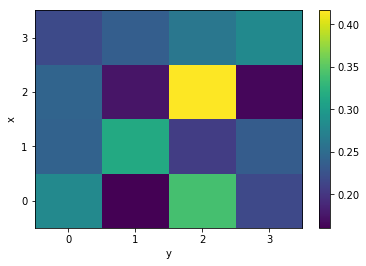

In [74]:
bbb = xr.plot.imshow(nda,  xticks=nt, yticks=nt, add_labels=True)
(str_nt)

[Text(0, 0, 'A'), Text(0, 0, 'C'), Text(0, 0, 'G'), Text(0, 0, 'T')]

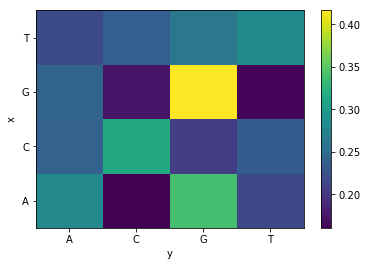

In [78]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
xr.plot.imshow(nda, ax=ax, xticks=nt, yticks=nt, add_labels=True)
ax.set_xticklabels(str_nt)
ax.set_yticklabels(str_nt)

In [82]:
mdl.marginals.network_dict[strEvent]

['dj_dinucl']

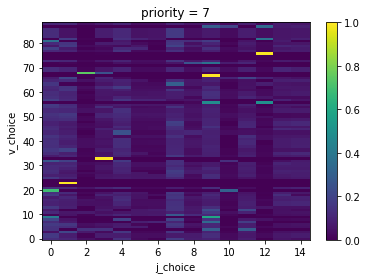

In [47]:
mdl.xdata['j_choice'].plot()

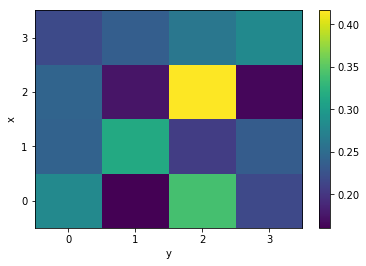

In [37]:
import xarray as xr
import numpy as np
dataa = np.random.randn(2, 3)
dataa

array([[-0.34819611,  0.93846483, -0.09826929],
       [ 1.12810562,  0.21455577,  1.15155634]])

In [38]:
array = xr.DataArray(dataa, coords=[('x', ['a', 'b']), ('y', [0, 1, 2])])
array

<xarray.DataArray (x: 2, y: 3)>
array([[-0.348196,  0.938465, -0.098269],
       [ 1.128106,  0.214556,  1.151556]])
Coordinates:
  * x        (x) <U1 'a' 'b'
  * y        (y) int64 0 1 2

In [39]:
stacked = array.stack(z=('x', 'y'))
stacked
stacked.unstack('z')

<xarray.DataArray (x: 2, y: 3)>
array([[-0.348196,  0.938465, -0.098269],
       [ 1.128106,  0.214556,  1.151556]])
Coordinates:
  * x        (x) object 'a' 'b'
  * y        (y) int64 0 1 2

In [16]:
mdl.xdata[strEvent].coords

Coordinates:
    priority   int64 1
  * dj_dinucl  (dj_dinucl) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15

Get pandas structure of data

In [7]:
mdl.parms.Event_dict['v_3_del']

,name,value
index,,
0,,-4
1,,-3
2,,-2
3,,-1
4,,0
5,,1
6,,2
7,,3
8,,4


One of the objectives is to edit genome templates and then write IGoR model. 

**I need to modify this

In [5]:
mdl.parms.write_model_parms(filename='myeditedmodel.txt')

NameError: name 'mdl' is not defined

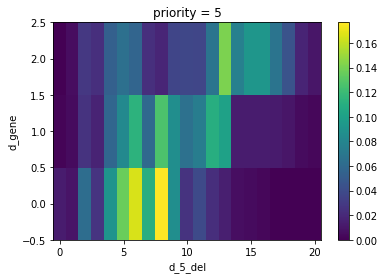

In [12]:
mdl.xdata['d_5_del'].plot()

In [13]:
mdl.export_event_to_csv('d_3_del','jaja.csv')

In [2]:
!head jaja.csv

d_gene,d_5_del,d_3_del,lbl__d_gene,lbl__d_5_del,lbl__d_3_del,Prob
0,0,0, TRBD1*01,-4,-4,0.0
0,0,1, TRBD1*01,-4,-3,0.0
0,0,2, TRBD1*01,-4,-2,0.0
0,0,3, TRBD1*01,-4,-1,1.6468e-08
0,0,4, TRBD1*01,-4,0,0.00482319
0,0,5, TRBD1*01,-4,1,1.08101e-09
0,0,6, TRBD1*01,-4,2,0.0195311
0,0,7, TRBD1*01,-4,3,0.0210679
0,0,8, TRBD1*01,-4,4,0.0359338


# Explore models

In [ ]:
import pygor3 as p3
mdl_mouse = p3.IgorModel.load_default("mouse", "tcr_beta")
mdl_human = p3.IgorModel.load_default("human", "tcr_beta")
mdl_mouse.parms.plot_Graph()+mdl_human.parms.plot_Graph()

In [ ]:
da_event_mouse = mdl_mouse.xdata['d_gene']
da_event_mouse[{'j_choice':0}]


In [ ]:
da_event_human = mdl_human.xdata['d_gene']
print(da_event_human[{'j_choice':0}])

In [ ]:
print(da_event_human[{'j_choice':0, 'v_choice':3}])

### Basic Exploration of default models

Load a IgorModel instance to encapsulate IGoR data model_parms and model_marginals files 

# Without running IGoR who can I load the model
1. give the specie and chain
2. resolve model_parms_file and model marginal_file
3. if no specie neither chain is supplied then 
4. Question batchname should have specie and chain? we always know this?

First we should load the package
The simplest way to use pygor is to run an IGoR task

In [2]:
import pygor3 as p3
task = p3.IgorTask()
task.igor_read_seqs = "data_test/SmallSequences.txt"
task.igor_batchname = "BBB"
task.igor_specie = "human"
task.igor_chain = "beta"
task.run_evaluate()


/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/IGoR/share/igor
/home/alfaceor/.local/bin/igor -set_wd /home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3 -batch BBB -read_seqs data_test/SmallSequences.txt
Batch name set to: BBB_
TXT extension detected for the input sequence file
Working directory set to: "/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/"
mkdir: cannot create directory ‘/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/aligns’: File exists


/home/alfaceor/.local/bin/igor -set_wd /home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3 -batch BBB -species human -chain beta -align  --all  
Batch name set to: BBB_
Species parameter set to: human
Chain parameter set to: beta
Working directory set to: "/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/"
Performing V alignments....
V_gene alignments [||||||||||||||||||||||||||||||||||||||||||||||||||]  Done. 
Performing D alignments....
D_gene alignments [||||||||||||||||||||||||||||||||||||||||||||||||||]

In [19]:
task.update_filenames()
task.igor_fln_output_pgen
!head {task.igor_fln_output_scenarios}

seq_index;scenario_rank;scenario_proba_cond_seq;GeneChoice_V_gene_Undefined_side_prio7_size89;GeneChoice_J_gene_Undefined_side_prio7_size15;GeneChoice_D_gene_Undefined_side_prio6_size3;Deletion_V_gene_Three_prime_prio5_size21;Deletion_D_gene_Five_prime_prio5_size21;Deletion_D_gene_Three_prime_prio5_size21;Deletion_J_gene_Five_prime_prio5_size23;Insertion_VD_genes_Undefined_side_prio4_size31;DinucMarkov_VD_genes_Undefined_side_prio3_size16;Insertion_DJ_gene_Undefined_side_prio2_size31;DinucMarkov_DJ_gene_Undefined_side_prio1_size16;Mismatches
17;1;0.0440476;(31);(8);(2);(8);(7);(15);(4);(0);();(0);();()
17;2;0.0332147;(31);(8);(2);(8);(7);(16);(4);(0);();(1);(1);()
17;3;0.0226536;(31);(8);(1);(8);(7);(15);(4);(0);();(0);();()
17;4;0.0180412;(31);(8);(2);(8);(5);(19);(4);(2);(0,1);(0);();()
17;5;0.0178797;(31);(8);(2);(8);(6);(18);(4);(0);();(2);(1,0);()
19;1;0.260819;(26);(4);(0);(7);(7);(6);(3);(5);(0,1,2,2,1);(2);(2,3);()
19;2;0.125907;(26);(4);(0);(7);(7);(7);(3);(5);(0,1,2,2,1);(3);

In [34]:
df = task.get_pgen_pd()
df.sort_index()
df

,Pgen_estimate
seq_index,
17,1.604300e-09
19,3.925640e-13
16,4.564940e-09
18,8.310010e-13
5,7.000130e-11
2,2.782890e-11
4,2.619350e-11
3,3.357330e-16
6,8.896930e-11


## Load all igor data available using wd and batchname

In [1]:
import pygor3 as p3
task = p3.IgorTask.load_from_batchname("testing")
task.igor_specie = "human"
task.igor_chain = "beta"
#task.load_IgorModel()
task.update_filenames()

/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/IGoR/share/igor
/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/IGoR/share/igor


In [ ]:
task.igor_model_marginals_file

In [ ]:
task.load_IgorModel()

In [2]:
df = task.get_pgen_pd()
df.head()


,Pgen_estimate,sequence,v_anchor,j_anchor,CDR3nt,CDR3aa
seq_index,,,,,,
0,3.065930e-16,AGCAACATGAGCCCTGAAGACAGCAGCATATATCTCTGCAGCGTTG...,36,81,TGCAGCGTTGTAGTGTTGAGGGGACGGACCGGGGAGCTGTTTTTT,CSVVVLRGRTGELFF
1,1.269130e-12,CTCAGGCTGGAGTTGGCTGCTCCCTCCCAGACATCTGTGTACTTCT...,45,81,TGTGCCAGCAGTTACGGGGGAGCCGGCTACACCTTC,CASSYGGAGYTF
2,2.782890e-11,AGTTCTAAGAAGCTCCTTCTCAGTGACTCTGGCTTCTATCTCTGTG...,42,81,TGTGCCTGGAGCGCCGGACAGAACTATGGCTACACCTTC,CAWSAGQNYGYTF
3,3.357330e-16,ACAGAGCGGGGGGACTCAGCCGTGTATCTCTGTGCCAGCAGCTCTG...,30,81,TGTGCCAGCAGCTCTGGGGCTAGCGGGGCCGCGAGAGAGACCCAGT...,CASSSGASGAARETQYF
4,2.619350e-11,ACCAGTGCCCATCCTGAAGACAGCAGCTTCTACATCTGCAGTGCTA...,36,81,TGCAGTGCTAGAGGCGGCAGGGCAAACACCGGGGAGCTGTTTTTT,CSARGGRANTGELFF


In [ ]:
task.mdl.xdata

In [ ]:
flnIgorSQL = "/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/pygor3/IgorDB.sql"
flnIgorBSSQL = "/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/pygor3/IgorDBBestScenariosVDJ.sql"
task.igor_specie = "human"
task.igor_chain = "beta"
task.update_batchname("testing")
task.load_VDJ_database(flnIgorSQL)
task.load_VDJ_BS_database(flnIgorBSSQL)


In [ ]:
task.igor_db_bs.fetch_IgorBestScenariosVDJ_By_seq_index(0)
df = task.igor_db_bs.

In [ ]:
import pandas as pd
df = pd.read_csv(task.igor_fln_output_scenarios, sep=';')
df

# Database to integrate all data 

In [ ]:
print(type(task.igor_db_bs)) # get_BestScenariosDataFrame


In [ ]:
flnIgorSQL = "/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/pygor3/IgorDB.sql"
flnIgorBSSQL = "/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/pygor3/IgorDBBestScenariosVDJ.sql"
task.load_VDJ_database(flnIgorSQL)
task.load_VDJ_BS_database(flnIgorBSSQL)


In [ ]:

import pygor3 as p3
flnIgorBSSQL = "/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/pygor3/IgorDBBestScenariosVDJ.sql"

db_bs = p3.IgorSqliteDBBestScenariosVDJ(flnIgorBSSQL) #
db_bs.createSqliteDB("testing_bs.db")

#createSqliteDB("testing_bs.db")
#task.load_VDJ_BS_database(flnIgorBSSQL)
#record_bs = task.igor_db_bs.fetch_IgorBestScenariosVDJ_By_seq_index(0)
#p3.IgorBestScenariosVDJ.load_FromSQLRecord(record_bs)

Now we want the pgen of the input sequences

In [ ]:
bs = p3.IgorBestScenariosVDJ.load_FromSQLRecord( db_bs.fetch_IgorBestScenariosVDJ_By_seq_index(0)[0] )

In [ ]:
task

In [ ]:

bs.to_dict_names()

In [ ]:
p3.IgorBestScenariosVDJ.load_FromLineBestScenario()

In [ ]:
p3.IgorSqliteDB.
p3.IgorSqliteDBBestScenarios

It does to following:
- First, task.igor_db_bs.by_index_list(index_list)
- Plot information about the scenarios and the corresponding pgen if available.

In [ ]:
task.

In [ ]:
task.mdl.xdata['j_choice'].sum()

In [ ]:
task.mdl.plot_dumm_report('d_gene')

In [ ]:
p3.IgorBestScenariosVDJ()


In [ ]:
dictionary
aaa = [ str(key)+"__"+str(dictionary[key]) for key in dictionary.keys()]
"___".join(aaa)

In [ ]:
values = [0, 1]
dictionary = dict(zip(dependencias, values))
dictionary

In [ ]:
task.mdl.xdata[strEvent][dep].values

In [ ]:
task.mdl.xdata[strEvent][dependencias]

Now we define the parameters to run a task:
- input sequences*
- model options*
- batchname (optional)


# Future implementations
- D-separation algorithm to calculate joint and conditional distribution


# Current problems
- 

# Ideas to explore and implement

In [ ]:
#import holoviews
import holoviews as hv
import pygor3 as p3

hv.extension('bokeh')
import hvplot.pandas  # noqa
mdl = p3.IgorModel.load_default("human", "tcr_beta")
strEvent='j_choice'
xarr = mdl.xdata[strEvent]

df = xarr.to_dataframe("P").drop('priority', 1)
ppp = df.hvplot(strEvent, groupby='v_choice')
#hv.Curve(df)
#.hvplot()
ppp


In [32]:
#!head myeditedmodel.txt
import pygor3 as p3
import pandas as pd
mdl = p3.IgorModel.load_default("human", "tcr_beta")
strEvent='j_choice'
da = mdl.xdata[strEvent]
df = pd.DataFrame(data=da.values, index=da['lbl__'+'v_choice'].values, columns=da['lbl__'+'j_choice'].values)
df

Parms filename:  /home/alfaceor/.local/share/igor/models/human/tcr_beta/models/model_parms.txt
Margs filename:  /home/alfaceor/.local/share/igor/models/human/tcr_beta/models/model_marginals.txt
--------------------------------------------------


,TRBJ1-1*01,TRBJ1-2*01,TRBJ1-3*01,TRBJ1-4*01,TRBJ1-5*01,TRBJ1-6*01,TRBJ1-6*02,TRBJ2-1*01,TRBJ2-2*01,TRBJ2-3*01,TRBJ2-4*01,TRBJ2-5*01,TRBJ2-6*01,TRBJ2-7*01,TRBJ2-7*02
TRBV1*01,1.285860e-01,1.040030e-01,0.041092,0.012810,1.358050e-01,2.381050e-02,6.879080e-03,1.739330e-01,0.080102,9.060060e-02,3.000290e-02,8.142200e-02,0.000000e+00,5.363640e-02,3.731860e-02
TRBV10-1*01,1.661260e-01,7.896150e-02,0.011370,0.078291,7.617960e-02,3.417340e-02,3.417280e-02,6.910550e-02,0.072392,1.267560e-01,2.495220e-02,6.339350e-02,2.460740e-02,6.490490e-02,7.461400e-02
TRBV10-1*02,1.661560e-01,7.901030e-02,0.011374,0.078249,7.624760e-02,3.418060e-02,3.418400e-02,6.908260e-02,0.072282,1.267240e-01,2.498430e-02,6.340040e-02,2.453540e-02,6.493340e-02,7.465540e-02
TRBV10-1*04,4.617740e-02,2.090470e-01,0.070037,0.027689,1.564730e-01,1.805870e-02,1.780010e-02,1.522210e-01,0.025102,9.714850e-02,9.188550e-03,7.073890e-02,9.944480e-03,4.302230e-02,4.735280e-02
TRBV10-2*01,1.423330e-01,0.000000e+00,0.141369,0.142328,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.894850e-01,0.000000e+00,2.844850e-01,0.000000e+00,0.000000e+00,0.000000e+00
TRBV10-3*01,1.453330e-01,1.318440e-01,0.031117,0.042833,8.187220e-02,7.553470e-02,1.953760e-03,1.393900e-01,0.042800,1.039300e-01,1.578060e-02,7.958960e-02,2.217750e-02,4.041580e-02,4.542880e-02
TRBV10-3*02,1.705440e-01,1.587910e-01,0.035434,0.053083,7.355640e-02,1.581760e-02,2.626480e-03,1.576120e-01,0.053600,1.089120e-01,0.000000e+00,7.852930e-02,1.784300e-03,4.243530e-02,4.727440e-02
TRBV11-1*01,1.211920e-01,6.913150e-02,0.000000,0.005208,1.397190e-06,8.419460e-02,9.779880e-02,1.004240e-01,0.000025,3.407990e-01,1.514370e-10,1.811800e-01,4.469680e-07,2.122490e-05,2.371980e-05
TRBV11-2*01,2.082520e-01,5.205710e-02,0.001359,0.000962,1.934410e-01,4.686350e-03,4.730330e-03,1.992580e-01,0.020095,1.453810e-01,1.668800e-03,7.008750e-02,5.037820e-02,2.319130e-02,2.445290e-02
TRBV11-2*02,4.095830e-01,0.000000e+00,0.000000,0.000000,0.000000e+00,1.014410e-07,1.020890e-07,1.421400e-05,0.000035,5.900340e-01,0.000000e+00,3.128540e-06,3.306850e-04,0.000000e+00,0.000000e+00


In [25]:
da['lbl__'+'v_choice'].values

array(['TRBV1*01', 'TRBV10-1*01', 'TRBV10-1*02', 'TRBV10-1*04',
       'TRBV10-2*01', 'TRBV10-3*01', 'TRBV10-3*02', 'TRBV11-1*01',
       'TRBV11-2*01', 'TRBV11-2*02', 'TRBV11-2*03', 'TRBV11-3*01',
       'TRBV12-1*01', 'TRBV12-2*01', 'TRBV12-3*01', 'TRBV12-4*01',
       'TRBV12-4*02', 'TRBV12-5*01', 'TRBV13*01', 'TRBV14*01',
       'TRBV15*01', 'TRBV15*02', 'TRBV15*03', 'TRBV16*01', 'TRBV17*01',
       'TRBV18*01', 'TRBV19*01', 'TRBV2*01', 'TRBV2*03', 'TRBV20-1*01',
       'TRBV23-1*01', 'TRBV24-1*01', 'TRBV25-1*01', 'TRBV26*01',
       'TRBV27*01', 'TRBV28*01', 'TRBV29-1*01', 'TRBV29-1*02',
       'TRBV3-1*01', 'TRBV3-1*02', 'TRBV3-2*01', 'TRBV3-2*02',
       'TRBV30*01', 'TRBV30*02', 'TRBV30*04', 'TRBV4-1*01', 'TRBV4-2*01',
       'TRBV4-3*01', 'TRBV4-3*02', 'TRBV5-1*01', 'TRBV5-3*01',
       'TRBV5-3*02', 'TRBV5-4*01', 'TRBV5-4*02', 'TRBV5-5*01',
       'TRBV5-6*01', 'TRBV5-7*01', 'TRBV5-8*01', 'TRBV6-1*01',
       'TRBV6-2*01', 'TRBV6-3*01', 'TRBV6-4*01', 'TRBV6-5*01',
       'TRB

In [19]:
df = pd.DataFrame(data=da.values, index=da['lbl__'+'v_choice'].values, columns=da['lbl__'+'j_choice'].values)

<xarray.DataArray (v_choice: 89, j_choice: 15)>
array([[1.28586e-01, 1.04003e-01, 4.10916e-02, ..., 0.00000e+00, 5.36364e-02,
        3.73186e-02],
       [1.66126e-01, 7.89615e-02, 1.13701e-02, ..., 2.46074e-02, 6.49049e-02,
        7.46140e-02],
       [1.66156e-01, 7.90103e-02, 1.13744e-02, ..., 2.45354e-02, 6.49334e-02,
        7.46554e-02],
       ...,
       [1.24050e-01, 4.76394e-02, 0.00000e+00, ..., 3.52196e-02, 5.51254e-02,
        6.01472e-02],
       [3.64941e-06, 2.04721e-09, 0.00000e+00, ..., 3.41728e-01, 6.84855e-02,
        8.22442e-02],
       [1.06077e-01, 1.13773e-01, 4.03129e-02, ..., 2.20679e-02, 7.16947e-02,
        5.81105e-02]])
Coordinates:
    priority       int64 7
  * v_choice       (v_choice) int64 0 1 2 3 4 5 6 7 ... 81 82 83 84 85 86 87 88
    lbl__v_choice  (v_choice) object 'TRBV1*01' 'TRBV10-1*01' ... 'TRBV9*01'
  * j_choice       (j_choice) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
    lbl__j_choice  (j_choice) object 'TRBJ1-1*01' 'TRBJ1-2*01' ... 'TRB

NameError: name '__file__' is not defined

In [1]:
import pygor3 as p3

In [3]:
task = p3.IgorTask()

/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/IGoR/share/igor


In [4]:
import pygor3 as p3
task = p3.IgorTask()
task.igor_read_seqs = "data_test/SmallSequences.txt"
task.igor_batchname = "CCC"
task.igor_specie = "human"
task.igor_chain = "beta"
task.run_evaluate()

/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/IGoR/share/igor
/home/alfaceor/.local/bin/igor -set_wd /home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3 -batch CCC -read_seqs data_test/SmallSequences.txt
Batch name set to: CCC_
TXT extension detected for the input sequence file
Working directory set to: "/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/"
mkdir: cannot create directory ‘/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/aligns’: File exists


/home/alfaceor/.local/bin/igor -set_wd /home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3 -batch CCC -species human -chain beta -align  --all  
Batch name set to: CCC_
Species parameter set to: human
Chain parameter set to: beta
Working directory set to: "/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/"
Performing V alignments....
V_gene alignments [||||||||||||||||||||||||||||||||||||||||||||||||||]  Done. 
Performing D alignments....
D_gene alignments [||||||||||||||||||||||||||||||||||||||||||||||||||]

In [9]:
task.update_batch_filenames()

KeyError: 'evaluate_infer_final_parms'

/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/IGoR/share/igor
/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/IGoR/share/igor


In [3]:
task